In [1]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
sys.path.append('../../..')
from src import fold, load_image, rotated_embryo, raw_data_path
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 150

if not os.path.exists('Figs'):
    os.mkdir('Figs')

In [2]:
res = pd.read_csv('../../../data/ring_ph_quantification_no_pb.csv')
df = pd.read_csv('../../../data/ring_ph_embryos_no_pb.csv')
df['Total'] = df['Total'] / 1000
df_wt = df[df.Line == 'nwg313']
df_c56s = df[df.Line == 'nwg373']
df_no_rnai = df[df.Condition == 'wt']
df_ph = df[df.Line == 'od58']

### Concentration profiles

In [3]:
def plot_profile(ax, df, c, cond, leg=None):
    if cond is not None:
        frames = df[df['Condition'] == cond]['EmbryoID']
    else: 
        frames = df['EmbryoID']
    mean_profile, std_profile = np.mean(profs[frames], axis=0), np.std(profs[frames], axis=0)
    ax.plot(mean_profile, c=c, label=leg + ' (n=%s)' % len(frames))
    ax.fill_between(np.arange(len(mean_profile)), mean_profile - std_profile, mean_profile + std_profile, alpha=0.2, 
                    color=c, linewidth=0)
    
profs = res.groupby('EmbryoID').apply(lambda x: x['Membrane signal'].to_numpy() / x['Cytoplasmic signal'].to_numpy())
profs = np.array([fold(x) for x in profs])

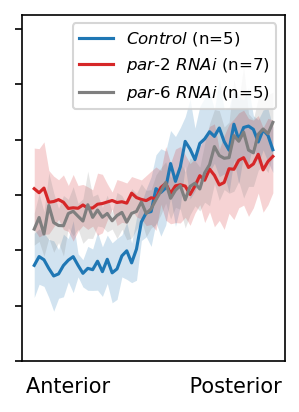

In [4]:
fig, ax = plt.subplots()
plot_profile(ax, df_wt, cond='wt', c='tab:blue', leg=r'$Control$')
plot_profile(ax, df_wt, cond='par2', c='tab:red', leg=r'$par$' + '-' + r'$2\ RNAi$')
plot_profile(ax, df_wt, cond='par6', c='tab:gray', leg=r'$par$' + '-' + r'$6\ RNAi$')
ax.set_ylim(bottom=0)
ax.set_xlabel('Anterior            Posterior', fontsize=10)
ax.set_xticks([])
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)
ax.legend(fontsize=8)
ax.set_ylim(0, 12.5)
ax.set_yticklabels([])
fig.set_size_inches(2.5, 3)
fig.subplots_adjust(left=0.2)
fig.savefig('Figs/ratio_profile_rnai.png', dpi=600, transparent=True)

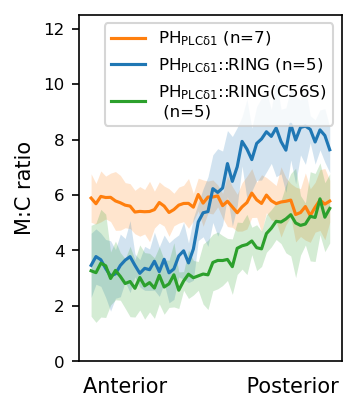

In [5]:
fig, ax = plt.subplots()
plot_profile(ax, df_ph, c='tab:orange', cond=None, leg=r'PH$_{\rm PLC\delta1}$')
plot_profile(ax, df_wt, c='tab:blue', cond='wt', leg=r'PH$_{\rm PLC\delta1}$::RING')
plot_profile(ax, df_c56s, c='tab:green', cond='wt',  leg=r'PH$_{\rm PLC\delta1}$::RING(C56S)' + '\n')
ax.set_ylim(bottom=0)
ax.set_xlabel('Anterior            Posterior', fontsize=10)
ax.set_ylabel('M:C ratio', fontsize=10)
ax.set_xticks([])
ax.set_ylim(0, 12.5)
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)
ax.legend(fontsize=8)
fig.set_size_inches(2.5, 3)
# fig.tight_layout()
fig.subplots_adjust(left=0.2)
fig.savefig('Figs/ratio_profile_wt_vs_c56s.png', dpi=600, transparent=True)

### Example images

2548.4548672128326


2436.319019149299


2549.5633576915325


2489.5376884947073


2451.214827282383


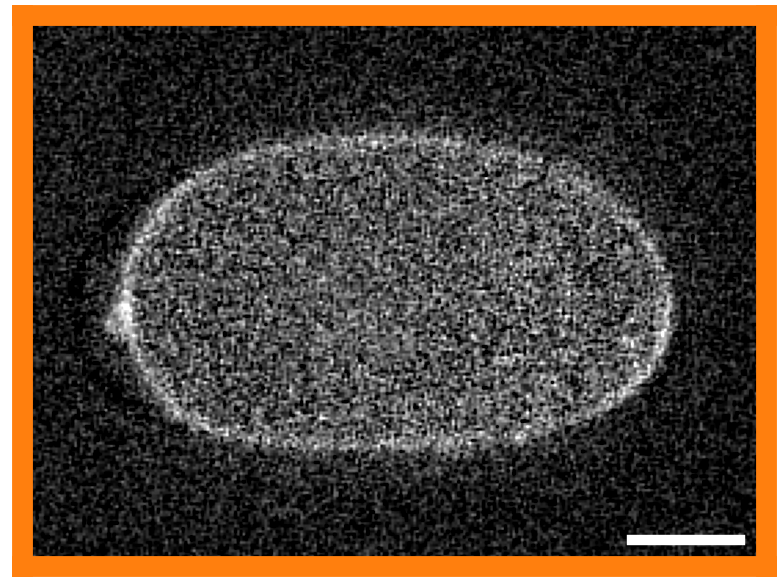

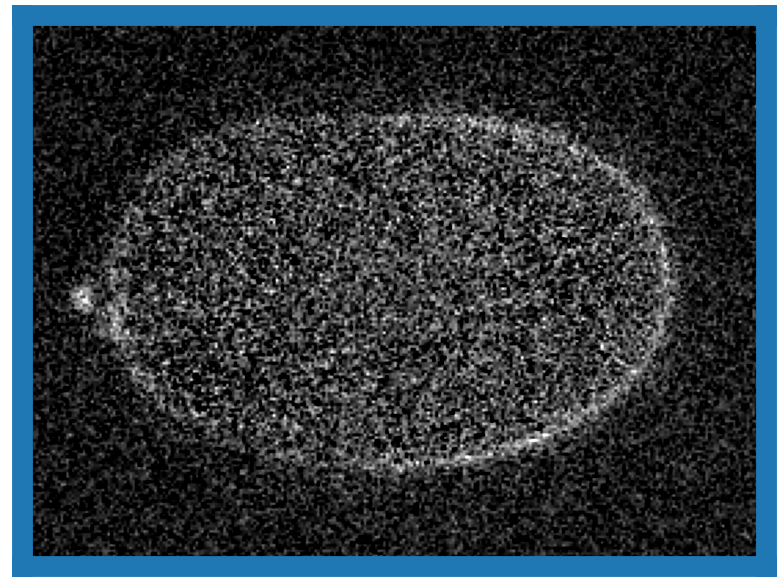

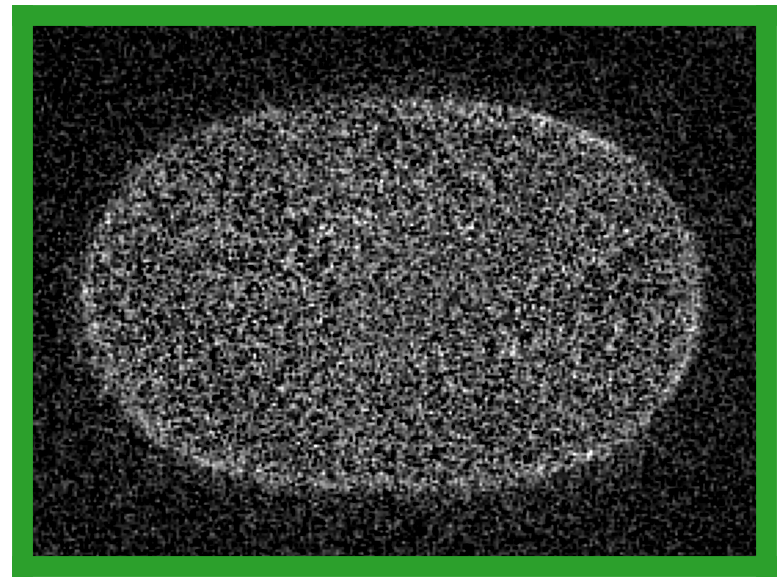

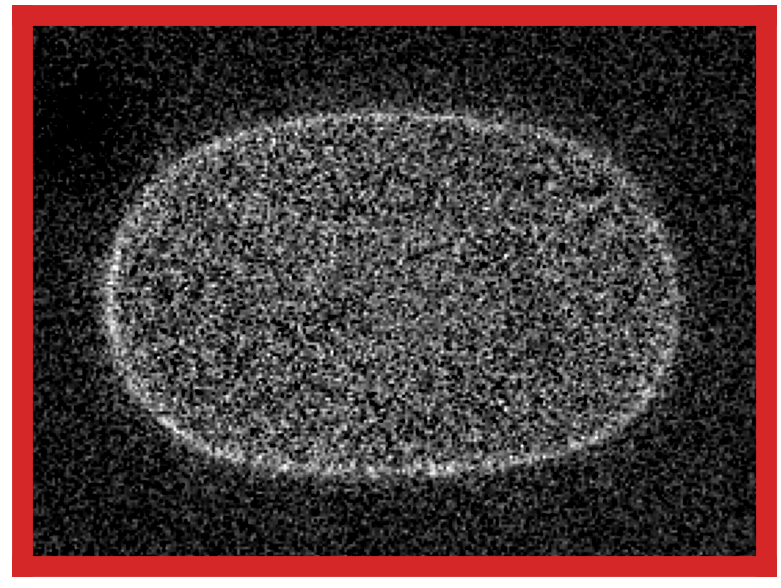

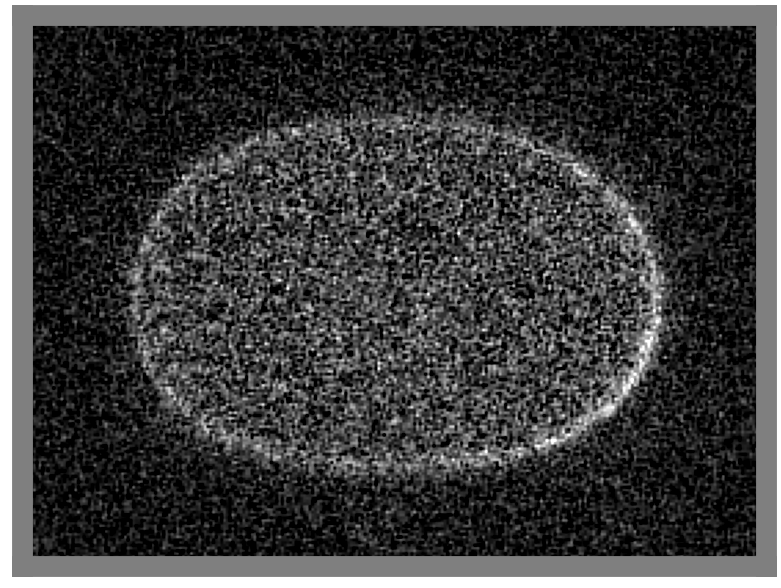

In [6]:
def create_figure(path, save_path, scale_bar=False, border=None):
    fig, ax = plt.subplots()
    img = load_image(path + '/af_corrected.tif')
    roi = np.loadtxt(path + '/ROI_fit.txt')
    rotated = rotated_embryo(img, roi, 270, 200, 3)
    print(np.percentile(rotated, 99.9))
    ax.imshow(rotated, vmin=0, vmax=2549.5633576915325, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])   
    [spine.set_edgecolor(border) for spine in ax.spines.values()]
    [spine.set_linewidth(10) for spine in ax.spines.values()]
    
    if scale_bar:
        px = 0.255 # pixel size
        bar_length = 10  # microns
        bar_pixels = bar_length / px
        y = rotated.shape[0] - 10
        ax.plot([rotated.shape[1]-10-bar_pixels, rotated.shape[1]-10], [y, y], color='w', linewidth=5)
    
    fig.savefig(save_path, dpi=600, transparent=True)
    
if raw_data_path:
    create_figure(df_ph.Path.iloc[3], 'Figs/img_ph.png', scale_bar=True, border='tab:orange')
    create_figure(df_no_rnai[df_no_rnai.Line == 'nwg313'].Path.iloc[1], 'Figs/img_ph_ring.png', border='tab:blue')
    create_figure(df_no_rnai[df_no_rnai.Line == 'nwg373'].Path.iloc[0], 'Figs/img_ph_ring_c56s.png', border='tab:green')
    create_figure(df_wt[df_wt.Condition == 'par2'].Path.iloc[2], 'Figs/img_ph_ring_par2.png', border='tab:red')
    create_figure(df_wt[df_wt.Condition == 'par6'].Path.iloc[2], 'Figs/img_ph_ring_par6.png', border='tab:gray')